# L4: Predictions, Prompts and Safety

- Load the Project ID and credentials.

In [1]:
from utils import authenticate
credentials, PROJECT_ID = authenticate() 

In [2]:
REGION = "us-central1"

- Import the [Vertex AI](https://cloud.google.com/vertex-ai) SDK.
- Import and load the model.
- Initialize it.

In [3]:
import vertexai
from vertexai.language_models import TextGenerationModel

In [4]:
vertexai.init(project = PROJECT_ID,
              location = REGION,
              credentials = credentials)

## Deployment

### Load Balancing

- Load from pre-trained `text-bison@001`
- Retrieve the endpoints (deployed as REST API)

In [5]:
model = TextGenerationModel.from_pretrained("text-bison@001")

- Get the list of multiple models executed and deployed.
- This helps to rout the traffic to different endpoints.

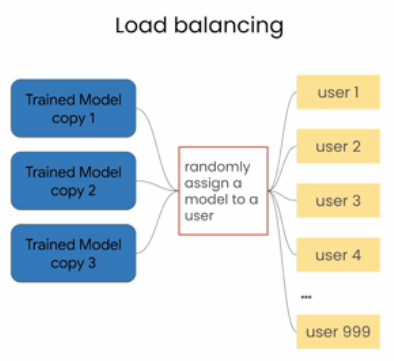

In [6]:
list_tuned_models = model.list_tuned_model_names()

In [7]:
for i in list_tuned_models:
    print (i)

projects/71361331534/locations/us-central1/models/6370255124683022336
projects/71361331534/locations/us-central1/models/4167964906898849792
projects/71361331534/locations/us-central1/models/5796209686239772672


- Randomly select from one of the endpoints to divide the prediction load.

In [8]:
import random

In [9]:
tuned_model_select = random.choice(list_tuned_models)

### Getting the Response

- Load the endpoint of the randomly selected model to be called with a prompt.
- The prompt needs to be as similar as possible as the one you trained your model on (python questions from stack overflow dataset)

In [12]:
deployed_model = TextGenerationModel.get_tuned_model\
(tuned_model_select)

In [33]:
PROMPT = "How do I concatenate multiple columns in SQL?"

- Use `deployed_model.predit` to call the API using the prompt. 

In [34]:
### depending on the latency of your prompt
### it can take some time to load
response = deployed_model.predict(PROMPT)

In [35]:
print(response)

MultiCandidateTextGenerationResponse(text='To concatenate multiple columns in SQL, you can use the CONCAT() function. The CONCAT() function takes a list of strings as its arguments and returns a single string that is the concatenation of all of the arguments.\n\nFor example, the following query would concatenate the values in the first and second columns of the `table` table:\n\n```sql\nSELECT CONCAT(first_column, second_column)\nFROM table;\n```\n\nYou can also use the CONCAT() function to concatenate strings with other values, such as numbers. For example, the following query would concatenate the values', _prediction_response=Prediction(predictions=[{'content': 'To concatenate multiple columns in SQL, you can use the CONCAT() function. The CONCAT() function takes a list of strings as its arguments and returns a single string that is the concatenation of all of the arguments.\n\nFor example, the following query would concatenate the values in the first and second columns of the `tabl

- `pprint` makes the response easily readable.

In [36]:
from pprint import pprint

- Sending multiple prompts can return multiple responses `([0], [1], [2]...)`
- In this example, only 1 prompt is being sent, and returning only 1 response `([0])`

In [37]:
### load the first object of the response
output = response._prediction_response[0]

In [38]:
### print the first object of the response
pprint(output)

[{'citationMetadata': {'citations': []},
  'content': 'To concatenate multiple columns in SQL, you can use the CONCAT() '
             'function. The CONCAT() function takes a list of strings as its '
             'arguments and returns a single string that is the concatenation '
             'of all of the arguments.\n'
             '\n'
             'For example, the following query would concatenate the values in '
             'the first and second columns of the `table` table:\n'
             '\n'
             '```sql\n'
             'SELECT CONCAT(first_column, second_column)\n'
             'FROM table;\n'
             '```\n'
             '\n'
             'You can also use the CONCAT() function to concatenate strings '
             'with other values, such as numbers. For example, the following '
             'query would concatenate the values',
  'safetyAttributes': {'blocked': False,
                       'categories': ['Derogatory',
                                      '

In [39]:
### load the second object of the response
output = response._prediction_response[0][0]

In [40]:
### print the second object of the response
pprint(output)

{'citationMetadata': {'citations': []},
 'content': 'To concatenate multiple columns in SQL, you can use the CONCAT() '
            'function. The CONCAT() function takes a list of strings as its '
            'arguments and returns a single string that is the concatenation '
            'of all of the arguments.\n'
            '\n'
            'For example, the following query would concatenate the values in '
            'the first and second columns of the `table` table:\n'
            '\n'
            '```sql\n'
            'SELECT CONCAT(first_column, second_column)\n'
            'FROM table;\n'
            '```\n'
            '\n'
            'You can also use the CONCAT() function to concatenate strings '
            'with other values, such as numbers. For example, the following '
            'query would concatenate the values',
 'safetyAttributes': {'blocked': False,
                      'categories': ['Derogatory',
                                     'Finance',
          

In [41]:
### retrieve the "content" key from the second object
final_output = response._prediction_response[0][0]["content"]

In [42]:
### printing "content" key from the second object
print(final_output)

To concatenate multiple columns in SQL, you can use the CONCAT() function. The CONCAT() function takes a list of strings as its arguments and returns a single string that is the concatenation of all of the arguments.

For example, the following query would concatenate the values in the first and second columns of the `table` table:

```sql
SELECT CONCAT(first_column, second_column)
FROM table;
```

You can also use the CONCAT() function to concatenate strings with other values, such as numbers. For example, the following query would concatenate the values


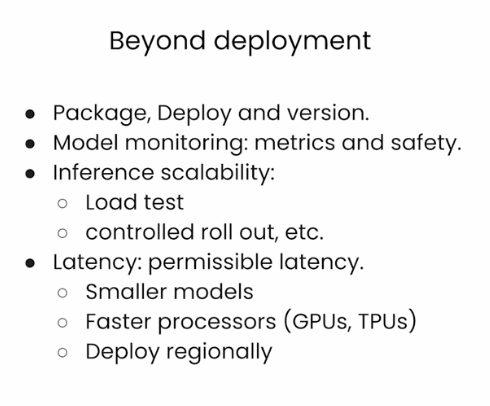

#### Prompt Management and Templates
- Remember that the model was trained on data that had an `Instruction` and a `Question` as a `Prompt` (Lesson 2).
- In the example above, *only*  a `Question` as a `Prompt` was used for a response.
- It is important for the production data to be the same as the training data. Difference in data can effect the model performance.
- Add the same `Instruction` as it was used for training data, and combine it with a `Question` to be used as a `Prompt`.

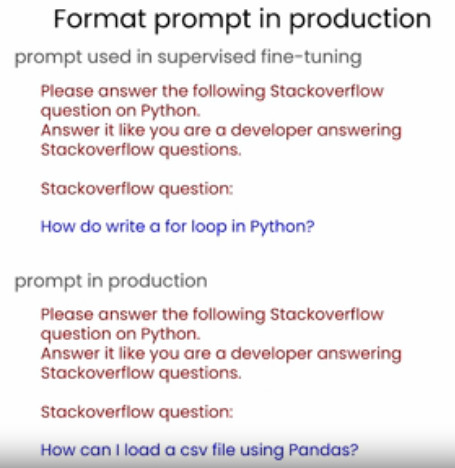

In [50]:
INSTRUCTION = """\
Please answer the following Stackoverflow question on Python.\
Answer it like\
you are a developer answering Stackoverflow questions.\
Question:
"""

In [51]:
QUESTION = "how to calculate eigenvalues of a matrix using numpy? Python example?"

- Combine the intruction and the question to create the prompt.

In [52]:
PROMPT = f"""
{INSTRUCTION} {QUESTION}
"""

In [53]:
print(PROMPT)


Please answer the following Stackoverflow question on Python.Answer it likeyou are a developer answering Stackoverflow questions.Question:
 how to calculate eigenvalues of a matrix using numpy? Python example?



- Get the response using the new prompt, which is consistent with the prompt used for training.

In [54]:
final_response = deployed_model.predict(PROMPT)

In [55]:
output = final_response._prediction_response[0][0]["content"]

- Note how the response changed from earlier.

In [56]:
print(output)

To calculate the eigenvalues of a matrix using NumPy, you can use the `eig()` function. This function takes a matrix as its input and returns a tuple of two arrays: the eigenvalues and the eigenvectors.

For example, the following code calculates the eigenvalues and eigenvectors of the matrix `[[1, 2], [3, 4]]`:

```
import numpy as np

A = np.array([[1, 2], [3, 4]])

eigenvalues, eigenvectors = np.linalg.eig(A)

print(eigenvalues)
print


### Safety Attributes
- The reponse also includes safety scores.
- These scores can be used to make sure that the LLM's response is within the boundries of the expected behaviour.
- The first layer for this check, `blocked`, is by the model itself.

In [57]:
### retrieve the "blocked" key from the 
### "safetyAttributes" of the response
blocked = response._prediction_response[0][0]\
['safetyAttributes']['blocked']

- Check to see if any response was blocked.
- It returns `True` if there is, and `False` if there's none.

In [58]:
print(blocked)

False


- The second layer of this check can be defined by you, as a practitioner, according to the thresholds you set.
- The response returns probabilities for each safety score category which can be used to design the thresholds.

In [59]:
### retrieve the "safetyAttributes" of the response
safety_attributes = response._prediction_response[0][0]\
['safetyAttributes']

In [60]:
pprint(safety_attributes)

{'blocked': False,
 'categories': ['Derogatory', 'Finance', 'Insult', 'Sexual'],
 'safetyRatings': [{'category': 'Dangerous Content',
                    'probabilityScore': 0.0,
                    'severity': 'NEGLIGIBLE',
                    'severityScore': 0.0},
                   {'category': 'Harassment',
                    'probabilityScore': 0.1,
                    'severity': 'NEGLIGIBLE',
                    'severityScore': 0.1},
                   {'category': 'Hate Speech',
                    'probabilityScore': 0.1,
                    'severity': 'NEGLIGIBLE',
                    'severityScore': 0.1},
                   {'category': 'Sexually Explicit',
                    'probabilityScore': 0.1,
                    'severity': 'NEGLIGIBLE',
                    'severityScore': 0.0}],
 'scores': [0.1, 0.1, 0.1, 0.1]}


### Citations
- Ideally, a LLM should generate as much original cotent as possible.
- The `citationMetadata` can be used to check and reduce the chances of a LLM generating a lot of existing content.

In [61]:
### retrieve the "citations" key from the 
### "citationMetadata" of the response
citation = response._prediction_response[0][0]\
['citationMetadata']['citations']

- Returns a list with information if the response is cited, if not, then it retuns an empty list.

In [62]:
pprint(citation)

[]


## Return a Citation

Now it is time for you to come up with an example, for which the model response should return citation infomration. The idea here is to see how that would look like, so keeping it basic, the prompt can be different than the coding examples used above. Below code is one such prompt:

In [71]:
PROMPT = "Imagination is more important than knowledge. Knowledge is limited, while imagination encompasses the entire world "

In [72]:
response = deployed_model.predict(PROMPT)

In [73]:
### output of the model
output = response._prediction_response[0][0]["content"]
print(output)

Knowledge is important, but it is limited. It is based on what we already know and understand. Imagination, on the other hand, is limitless. It allows us to create new things and to see the world in new ways. Imagination is the key to innovation and creativity. It is what allows us to dream big and to achieve our goals.

Albert Einstein said, "Imagination is more important than knowledge. For knowledge is limited, whereas imagination embraces the entire world, stimulating progress, giving birth to evolution."

There are many examples of how imagination has led to innovation and creativity. The Wright brothers imagined a world where


In [74]:
### check for citation
citation = response._prediction_response[0][0]\
['citationMetadata']['citations']

pprint(citation)

[{'endIndex': 505.0,
  'startIndex': 346.0,
  'url': 'https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5135543/'}]


### Optional Notebook

[Tuning and deploy a foundation model](https://github.com/GoogleCloudPlatform/generative-ai/blob/main/language/tuning/tuning_text_bison.ipynb)